<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import yfinance
import yfinance as yf

# Get the data for the stock NVDA
start = '2014-09-17'

In [3]:
# Nvidia prediction

In [4]:
# Bringing data from yfinance to dataframe - NVIDIA
df = yf.download('NVDA',start)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Bringing data into csv file
df.to_csv('nvidia_data.csv', encoding='utf-8', index=True)

In [6]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00-04:00,4.7725,4.8325,4.7500,4.7875,4.580184,17358400
2014-09-18 00:00:00-04:00,4.8175,4.8650,4.8025,4.8600,4.649544,21960400
2014-09-19 00:00:00-04:00,4.8750,4.8800,4.7625,4.7700,4.563442,60131600
2014-09-22 00:00:00-04:00,4.8675,4.8675,4.7175,4.7225,4.517997,22146400
2014-09-23 00:00:00-04:00,4.6975,4.7550,4.6800,4.7025,4.498864,19614400


In [7]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

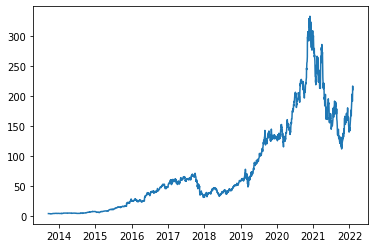

In [8]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [9]:
# length of dataframe
len(df)

2111

In [10]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [11]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[4.580183506011963,
 4.649543762207031,
 4.563441753387451,
 4.5179972648620605,
 4.49886417388916,
 4.525173664093018,
 4.427111625671387,
 4.436679363250732,
 4.429503917694092,
 4.412762641906738,
 4.369711399078369,
 4.3505754470825195,
 4.360143661499023,
 4.333836555480957,
 4.288391590118408,
 4.367318630218506,
 4.283608436584473,
 4.030084609985352,
 4.0157341957092285,
 4.109009265899658,
 4.1711955070495605,
 4.173588275909424,
 4.166411399841309,
 4.202290058135986,
 4.381669998168945,
 4.278824329376221,
 4.37449312210083,
 4.419938087463379,
 4.422328948974609,
 4.527564525604248,
 4.49886417388916,
 4.4701642990112305,
 4.673460960388184,
 4.752388954162598,
 4.814573287963867,
 4.814573287963867,
 4.836101531982422,
 4.733253479003906,
 4.78826379776001,
 4.730863094329834,
 4.699770927429199,
 4.675853252410889,
 4.733253479003906,
 4.711728572845459,
 4.824141025543213,
 4.806126117706299,
 4.885389804840088,
 4.911808013916016,
 4.9430317878723145,
 4.94063138961792,

In [12]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[167.53729248046875,
 169.44949340820312,
 175.52560424804688,
 175.9324951171875,
 174.3148651123047,
 173.3685302734375,
 174.0352020263672,
 178.03277587890625,
 179.9654083251953,
 177.6657257080078,
 177.88296508789062,
 186.342529296875,
 186.15774536132812,
 184.04534912109375,
 188.63467407226562,
 190.3376007080078,
 191.81825256347656,
 190.07542419433594,
 199.60365295410156,
 200.02064514160156,
 199.77842712402344,
 201.87083435058594,
 204.61746215820312,
 206.7298583984375,
 203.4663848876953,
 198.78216552734375,
 200.25535583496094,
 204.87216186523438,
 202.25039672851562,
 198.17041015625,
 189.42872619628906,
 181.38612365722656,
 187.56600952148438,
 185.89056396484375,
 193.86074829101562,
 195.698486328125,
 195.3389129638672,
 192.70217895507812,
 191.84323120117188,
 194.7895965576172,
 196.37762451171875,
 194.74966430664062,
 197.25656127929688,
 197.90574645996094,
 202.4901123046875,
 206.1156005859375,
 203.40895080566406,
 202.6998291015625,
 199.11424255

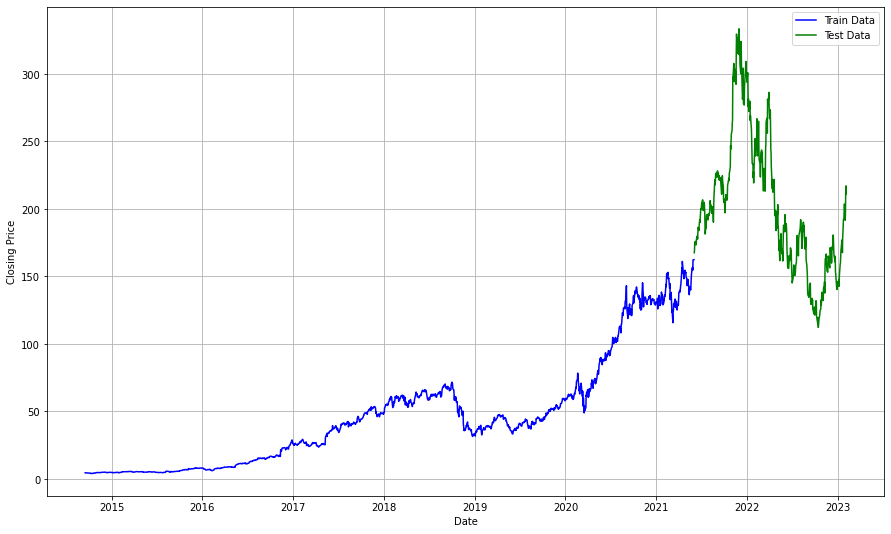

In [13]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [14]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [15]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [16]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2109
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -5763.040
Method:                       css-mle   S.D. of innovations              3.720
Date:                Sat, 04 Feb 2023   AIC                          11538.080
Time:                        15:44:24   BIC                          11572.003
Sample:                             1   HQIC                         11550.502
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1004      0.076      1.325      0.185      -0.048       0.249
ar.L1.D.y     -0.0361      0.022     -1.658      0.097      -0.079       0.007
ar.L2.D.y     -0.0366      0.022     -1.672      0.0

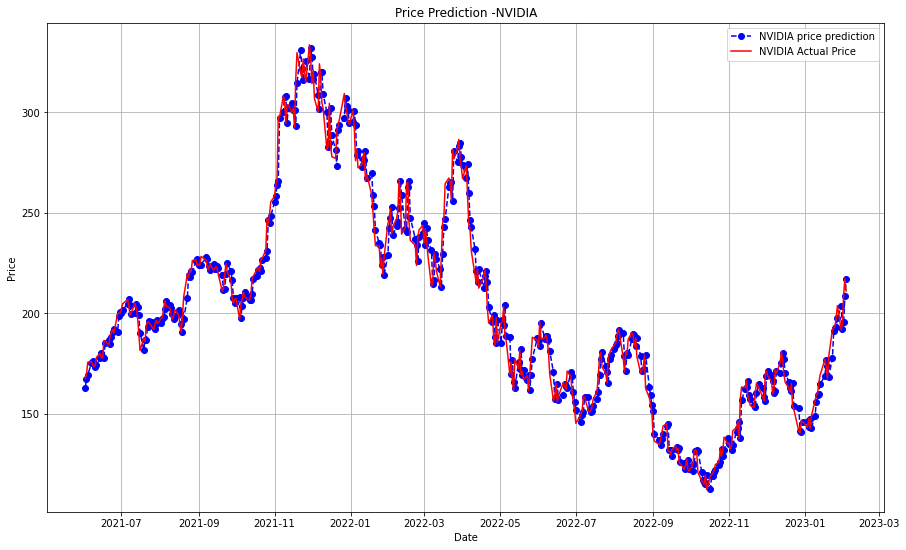

In [17]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='NVIDIA price prediction')
plt.plot(start_date, test, color ='red', label ='NVIDIA Actual Price')
plt.title('Price Prediction -NVIDIA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.028541166170004677


MAPE of 2.9% implies the model is 97.1% accurate in predicting the test obeservations

In [19]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 201.8386928296822
Mean Squared Error: 7.622538502944018


In [20]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 211.28325118812757
Prediction 168.90258815461164
Prediction 171.52994621185786
Prediction 175.4591759922829
Prediction 176.64588495153188


In [21]:
# Converting list to dataframe 
Prediction = pd.DataFrame(prediction_next_5_days)

In [22]:
#Reviewing dataframe
Prediction

,0
0,211.283251
1,168.902588
2,171.529946
3,175.459176
4,176.645885


In [23]:
#Converting dataframe to csv for visualization
Prediction.to_csv('NVIDIA_prediction.csv', header='Prediction', index=True)